Please note that this document writes to and reads from a folder directory called results_dir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#MAY NEED TO RUN A COUPLE OF TIMES IF IT SAYS TO RESTART THE RUNTIME
#Import statements
from PIL import Image  # this contain the image class and methods from PIL library
import numpy as np # this imports the numerical and array library 
import matplotlib.pyplot as plt # this is for plotting (showing) images
from skimage import measure
import matplotlib as mpl
import random

import cv2
import sklearn
import tensorflow as tf
!pip install opencv-contrib-python==3.4.2.17

from sklearn.utils import shuffle

import os
!pip install keras
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, SeparableConv2D, Activation

In [ ]:
#Get the saved card images from the train-XXX.jpg image files from the drive and save them in a list
cards_train = []
for j in range(1, 17):
    #Read the image (as BGR by default)
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/train1, ' + str(j) + '.jpg')
    #Convert image to RGB
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    #Add numpy RGB form of image to the list
    im_rgb = np.asarray(im_rgb)
    cards_train.append(im_rgb)
for i in range(2, 11):
    for j in range(1, 19):
        im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/train' + str(i) + ', ' + str(j) + '.jpg')
        im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
        im_rgb = np.asarray(im_rgb)
        cards_train.append(im_rgb)
for i in range(12, 14):
    for j in range(1, 19):
        im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/train' + str(i) + ', ' + str(j) + '.jpg')
        im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
        im_rgb = np.asarray(im_rgb)
        cards_train.append(im_rgb)
for j in range(1, 12):
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/train14, ' + str(j) + '.jpg')
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    im_rgb = np.asarray(im_rgb)
    cards_train.append(im_rgb)

In [ ]:
#Find the coordinate bounding box of a given label in a components image
def bounding_box(comps, label):
    #Array of image coordinates in x and y
    xx, yy = np.meshgrid(np.arange(0,comps.shape[1]), np.arange(0,comps.shape[0]))

    #Mask/select by where value is given label (component)
    where_x = xx[comps==label]
    where_y = yy[comps==label]
    
    #Find min and max extents of coordinates
    return np.min(where_x), np.min(where_y), np.max(where_x), np.max(where_y)

In [ ]:
#Seperate out the card images from each test-XXX.jpeg image file and save them to the drive
data_dir = 'drive/My Drive/CS413_IVA_Coursework/DATA/'

for i in range(1,11):
    if (i <= 7) or (i == 9):
        #Read the image (as BGR by default)
        im_bgr = cv2.imread(data_dir + 'test-00'+str(i)+'.jpeg')
        #Get a copy in RGB
        im_rgb = cv2.cvtColor(im_bgr,cv2.COLOR_BGR2RGB)
    elif (i == 10):
        im_bgr = cv2.imread(data_dir + 'test-0'+str(i)+'.jpeg')
        im_rgb = cv2.cvtColor(im_bgr,cv2.COLOR_BGR2RGB)
    if (i != 8):
        #Counter for each card image
        j = 1

        image_thresh = np.all(np.logical_and(im_rgb > [0, 80, 0], im_rgb < [125, 255, 125]), axis = 2)
        for ii in range(im_rgb.shape[0]):
            for jj in range(im_rgb.shape[1]):
                if image_thresh[ii][jj] == True:
                    for kk in range(im_rgb.shape[2]):
                        im_rgb[ii][jj][kk] = 255
        
        image_grey = cv2.cvtColor(im_rgb,cv2.COLOR_RGB2GRAY)

        image_grey_thresh = (image_grey < 254)

        #Extract all connected components
        comps = measure.label(image_grey_thresh, background = False)
        #Refine down to unique labels
        unique = np.unique(comps)

        #Bounds on the size of card images that we want
        min_size = 20000
        max_size = 1000000
        for l in unique:
            #Make a binary image for each component
            one_comp = np.zeros(comps.shape, dtype = 'uint8')
            one_comp[comps == l] = 1

            #Measure the size of the component
            n = np.count_nonzero(one_comp)

            #Save the card image to the drive if it is within the set size
            if (n > min_size) and (n < max_size):
                #Get the coordinate bounding box of a given label in a components image
                bb = bounding_box(comps, label = l)
                #Extract the bounding box region of the BGR and RGB images
                one_comp_bgr = im_bgr[bb[1]:bb[3],bb[0]:bb[2]]
                one_comp_rgb = im_rgb[bb[1]:bb[3],bb[0]:bb[2]]
                #Save the extracted card image
                cv2.imwrite('drive/My Drive/CS413_IVA_Coursework/results_dir/test' + str(i) + ', ' + str(j) + '.jpg', one_comp_bgr)
                #Increase the card image counter
                j = j + 1

In [ ]:
#Get the saved card images from the test-XXX.jpeg image files from the drive and save them in a list
cards_test = []
for i in range(1, 19):
    #Read the image (as BGR by default)
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/test1, ' + str(i) + '.jpg')
    #Convert image to RGB
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    #Add numpy RGB form of image to the list
    im_rgb = np.asarray(im_rgb)
    cards_test.append(im_rgb)

for i in range(1, 13):
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/test2, ' + str(i) + '.jpg')
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    im_rgb = np.asarray(im_rgb)
    cards_test.append(im_rgb)

for i in range(1, 16):
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/test3, ' + str(i) + '.jpg')
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    im_rgb = np.asarray(im_rgb)
    cards_test.append(im_rgb)

for i in range(1, 13):
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/test4, ' + str(i) + '.jpg')
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    im_rgb = np.asarray(im_rgb)
    cards_test.append(im_rgb)

for i in range(1, 19):
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/test5, ' + str(i) + '.jpg')
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    im_rgb = np.asarray(im_rgb)
    cards_test.append(im_rgb)

for i in range(1, 20):
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/test6, ' + str(i) + '.jpg')
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    im_rgb = np.asarray(im_rgb)
    cards_test.append(im_rgb)

for i in range(1, 19):
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/test7, ' + str(i) + '.jpg')
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    im_rgb = np.asarray(im_rgb)
    cards_test.append(im_rgb)

for i in range(1, 17):
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/test9, ' + str(i) + '.jpg')
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    im_rgb = np.asarray(im_rgb)
    cards_test.append(im_rgb)

for i in range(1, 13):
    im_bgr = cv2.imread('drive/My Drive/CS413_IVA_Coursework/results_dir/test10, ' + str(i) + '.jpg')
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    im_rgb = np.asarray(im_rgb)
    cards_test.append(im_rgb)

In [ ]:
#Stores the labels of each card from the train-XXX.jpg image in the order that they are saved to the drive
#Each new image starts on a new line
labels_225 = [5, 67, 52, 35, 40, 18, 31, 47, 52, 33, 210, 33, 54, 63, 26, 36, 33, 48,
73, 57, 57, 54, 89, 17, 60, 66, 54, 57, 76, 33, 68, 25, 68, 33, 63, 83,
36, 56, 65, 89, 44, 4, 96, 15, 59, 15, 63, 11, 69, 1, 89, 1, 62, 56,
54, 17, 89, 57, 57, 73, 76, 57, 54, 66, 33, 60, 68, 63, 33, 25, 83, 68,
31, 26, 48, 36, 33, 54, 52, 67, 52, 210, 47, 33, 40, 18, 35, 33, 63, 5,
7, 92, 63, 96, 54, 11, 42, 82, 24, 45, 37, 11, 98, 21, 65, 28, 2, 24,
160, 150, 177, 192, 161, 87, 138, 164, 183, 124, 190, 104, 101, 135, 115, 142, 168, 114,
109, 147, 139, 136, 106, 129, 146, 186, 182, 109, 154, 108, 198, 151, 127, 189, 108, 146,
196, 134, 174, 103, 198, 192, 114, 190, 147, 182, 154, 192, 142, 146, 148, 133, 174, 191,
172, 133, 134, 182, 171, 120, 181, 172, 189, 156, 111, 181, 139, 106, 156, 184, 139, 131,
150, 162, 165, 139, 139, 121, 139, 112, 125, 112, 136, 170, 127, 135, 181, 114, 109, 198,
121, 193, 168, 162, 119, 112, 151, 187, 104, 121, 168]

#Changes each unique label (of which there are 104) to a unique label between 1 and 104
#Order the labels
ordered_labels = np.sort(labels_225)
#Remove duplicate labels
unique_labels = np.unique(ordered_labels)
#Stores the label mapping
labels_mapping = {}
#Assigns each new label between 1 and 255 the next lowest available label between 1 and 104
for i in range(0, 104):
    labels_mapping[unique_labels[i]] = i

#Change each label between 1 and 255 its new label between 1 and 104
labels_104 = []
for i in range(len(labels_225)):
    labels_104.append(labels_mapping[labels_225[i]])

#Convert to a numpy array
labels_104 = np.asarray(labels_104)

#Removes the unlabelled cards from the image cards from the train-XXX image files
cards_train_17to225 = cards_train[16:]

In [ ]:
#Stores the labels of each card image from the test-XXX.jpeg files in the order that they are saved to the drive
#Each new image starts on a new line
labels_test = [0, 138, 15, 61, 114, 56, 154, 0, 109, 189, 147, 44, 0, 197, 139, 189, 157, 138,
               1, 0, 173, 44, 109, 0, 189, 147, 197, 189, 139, 181,
               44, 0, 147, 139, 109, 189, 154, 61, 56, 61, 134, 138, 168, 39, 0,
               0, 134, 189, 147, 154, 61, 56, 109, 138, 114, 80, 15,
               0, 189, 154, 139, 56, 147, 197, 109, 114, 189, 44, 1, 173, 172, 37, 76, 63, 0,
               138, 15, 114, 56, 1, 172, 154, 109, 189, 76, 44, 147, 173, 197, 139, 189, 37, 157, 138,
               157, 0, 138, 173, 189, 44, 197, 139, 147, 209, 189, 56, 181, 154, 61, 61, 138, 134,
               44, 197, 139, 147, 109, 181, 189, 56, 154, 61, 61, 138, 134, 0, 168, 39,
               61, 0, 109, 134, 154, 61, 39, 168, 138, 151, 0, 168]

In [ ]:
x = cards_train_17to225
y = labels_104

#Find the maximum number of rows and the maximum number of columns in a card image
min_x = x[0].shape[1]
min_y = x[0].shape[0]
for i in range(len(x)):
    current_y = x[i].shape[0]
    current_x = x[i].shape[1]
    if current_x < min_x:
        min_x = current_x
    if current_y < min_y:
        min_y = current_y

for i in range(len(x)):
    x[i] = cv2.resize(x[i], (min_y, min_x))
    #Normalise the values in each card
    x[i] = x[i]/255.0

x_train, x_val, x_duplicates = [], [], []
y_train, y_val, y_duplicates = [], [], []

#Add at least one card of each label to the training data
#Stores the labels that we have added
added = []
for i in range(len(y)):
    current = y[i]
    if current not in added:
        x_train.append(x[i])
        y_train.append(y[i])
        added.append(current)
    else:
        #Store as a duplicate
        x_duplicates.append(x[i])
        y_duplicates.append(y[i])

#Randomly add some more training examples and add the rest to the validation set
#Shuffle the duplicate card images 
x_duplicates, y_duplicates = shuffle(x_duplicates, y_duplicates, random_state=0)
#Add some to the training set
for i in range(42):
    x_train.append(x_duplicates[i])
    y_train.append(y_duplicates[i])

#Add the rest to the validation set
for i in range(63):
    x_val.append(x_duplicates[i+42])
    y_val.append(y_duplicates[i+42])

#Shuffle the training data
x_train, y_train = shuffle(x_train, y_train, random_state=0)

#Convert arrays to numpy arrays
x_train = np.asarray(x_train)
x_val = np.asarray(x_val)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

In [ ]:
#Resize and normalise the card images from the test-XXX.jpeg files
for i in range(len(cards_test)):
    cards_test[i] = cv2.resize(cards_test[i], (min_y, min_x))
    #Normalise the values in each card
    cards_test[i] = cards_test[i]/255.0
cards_test = np.asarray(cards_test)

#Only keep the test labels that we have been able to learn and those that look like they are able to be predicted correctly (not cut off too much)
for i in range(len(labels_test)):
    if labels_test[i] == 0 or labels_test[i] == 61 or labels_test[i] == 6 or labels_test[i] == 197 or labels_test[i] == 55 or labels_test[i] == 8 or labels_test[i] == 27 or labels_test[i] == 77 or labels_test[i] == 157 or labels_test[i] == 38 or labels_test[i] == 22 or labels_test[i] == 9 or labels_test[i] == 3 or labels_test[i] == 70 or labels_test[i] == 173 or labels_test[i] == 39 or labels_test[i] == 90 or labels_test[i] == 84 or labels_test[i] == 34 or labels_test[i] == 80 or labels_test[i] == 209 or labels_test[i] == 32:
        labels_test[i] = 0
    else:
        labels_test[i] = labels_mapping[labels_test[i]]
labels_test = np.asarray(labels_test)
x_test = []
y_test = []
indices = []
for i in range(len(labels_test)):
    if labels_test[i] != 0:
        indices.append(i)
for i in range(len(indices)):
    x_test.append(cards_test[indices[i]])
    y_test.append(labels_test[indices[i]])

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [ ]:
#Change the dimensions of x_train, x_val as required
data_dir = 'drive/My Drive/CS413_IVA_Coursework/DATA/'

#Input image dimensions
im_gbr = cv2.imread(data_dir + 'train-001.jpg')
#Convert from BGR ordering to RGB
im = cv2.cvtColor(im_gbr,cv2.COLOR_BGR2RGB)
img_rows, img_cols, num_channels = x_train[0].shape

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], num_channels, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], num_channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], num_channels, img_rows, img_cols)
    input_shape = (num_channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, num_channels)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, num_channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, num_channels)
    input_shape = (img_rows, img_cols, num_channels)
    
print('input_shape is ', input_shape)

input_shape is  (459, 563, 3)


In [ ]:
#Convert the labels to one-hot encodings
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

#Pad the label arrays on the right side to ensure that they have size 104
y_train = np.pad(y_train, pad_width = ((0,0),(0, 104 - y_train.shape[1])))
y_val = np.pad(y_val, pad_width = ((0,0),(0, 104 - y_val.shape[1]),))
y_test = np.pad(y_test, pad_width = ((0,0),(0, 104 - y_test.shape[1]),))

In [ ]:
#Transfer learning
#Use MobileNet
from tensorflow.keras.applications.mobilenet import MobileNet
conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape, pooling = 'avg')
model = Sequential()
model.add(conv_base)

#Add a layer to flatten the output
model.add(Flatten())

#Add a fully connected layer with 32 nodes, batch normalisation, and a ReLU activation function
model.add(Dense(128))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

#Add a fully connected layer with a softmax activation function
model.add(Dense(104, activation='softmax'))

#Print out a summary of the model
model.summary()

#Do not allow the weights in the convolution layers to be changed
conv_base.trainable = False

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                         

In [ ]:
#Set up an augmented data generator
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 360,
                                    shear_range = 0.3,
                                    zoom_range = 0.3,
                                    fill_mode = 'nearest')

#Use or delete
#brightness_range=None

In [ ]:
#Train the model on the training data and calculate the loss and accuracy on the validation data
#Set the batch size and number of epochs
batch_size = 32
epochs = 40

#Use categorical cross entropy loss, Adam optimiser and the accuracy metric
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

#Train the model with augmented data generated on the fly
history = model.fit(data_generator.flow(x_train, y_train, batch_size = 32),
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_val, y_val))

Epoch 1/40
5/5 [==============================] - 44s 8s/step - loss: 4.9720 - accuracy: 0.0205 - val_loss: 4.7052 - val_accuracy: 0.0317
Epoch 2/40
5/5 [==============================] - 41s 8s/step - loss: 4.3982 - accuracy: 0.0479 - val_loss: 4.5201 - val_accuracy: 0.0476
Epoch 3/40
5/5 [==============================] - 41s 8s/step - loss: 4.0401 - accuracy: 0.1644 - val_loss: 4.3461 - val_accuracy: 0.0794
Epoch 4/40
5/5 [==============================] - 41s 8s/step - loss: 3.7160 - accuracy: 0.2740 - val_loss: 4.1826 - val_accuracy: 0.0794
Epoch 5/40
5/5 [==============================] - 41s 9s/step - loss: 3.3955 - accuracy: 0.3425 - val_loss: 4.0256 - val_accuracy: 0.1905
Epoch 6/40
5/5 [==============================] - 41s 8s/step - loss: 3.1394 - accuracy: 0.4932 - val_loss: 3.8535 - val_accuracy: 0.2222
Epoch 7/40
5/5 [==============================] - 44s 9s/step - loss: 2.8921 - accuracy: 0.5342 - val_loss: 3.6812 - val_accuracy: 0.2698
Epoch 8/40
5/5 [==================

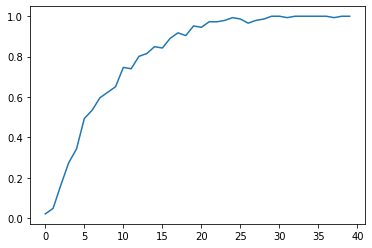

In [ ]:
#Shows the accuracy against number of epochs
plt.plot(history.history['accuracy'])

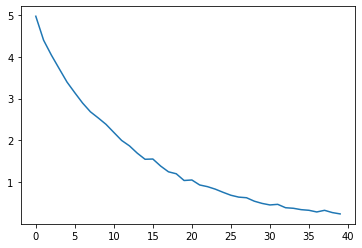

In [ ]:
#Shows the loss against number of epochs
plt.plot(history.history['loss'])

In [ ]:
#Evaluate the model on the test data
score = model.evaluate(x = x_test, y = y_test, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

3/3 [==============================] - 16s 5s/step - loss: 2.7806 - accuracy: 0.4000
Test loss: 2.78062105178833
Test accuracy: 0.4000000059604645


In [ ]:
#Output the prediction for given inputs
def output_prediction(input):
    ynew = model.predict(input)
    y_hat = []
    for i in range(len(ynew)):
        pred = ynew[i].argmax()
        for key, value in labels_mapping.items():
            if value == pred:
                y_hat.append(key)
    return y_hat

In [ ]:
#Calculate the predictions on the test data
y_test_hat = output_prediction(x_test)
print(y_test_hat)

[134, 134, 134, 146, 146, 181, 134, 134, 134, 87, 189, 134, 44, 109, 189, 147, 189, 181, 42, 44, 134, 181, 134, 134, 154, 127, 134, 127, 168, 134, 133, 147, 154, 56, 189, 138, 28, 15, 134, 182, 181, 4, 147, 109, 134, 134, 25, 172, 11, 76, 63, 87, 146, 134, 127, 172, 134, 109, 189, 87, 44, 147, 210, 189, 82, 138, 134, 127, 134, 139, 134, 127, 127, 134, 134, 87, 134, 146, 181, 134, 134, 181, 127, 82, 87, 134, 134, 134, 109, 134, 154, 168, 138, 151, 134]
